In [57]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 



# Analyzing Data 

In [3]:
data=pd.read_csv("C:/Users/Khushal/Desktop/IIC/DA/ML/project/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
data.isnull().sum()
#no missing value at all.
#Hence no need to data wrangling

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#removing not required columns

In [12]:
data=data.drop(['CustomerID','Spending Score (1-100)','Gender'],axis=1)

In [18]:
data.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


# using Elbow method to find the value of 'K'

In [10]:
from sklearn.cluster import KMeans
km=KMeans()

In [20]:
k_rang=range(1,10)
sse=[]

for i in k_rang:
    km=KMeans(n_clusters=i)
    km.fit(data[['Age','Annual Income (k$)']])
    sse.append(km.inertia_)
    

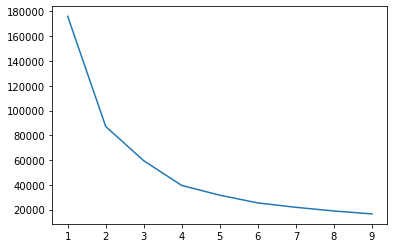

In [22]:
plt.plot(k_rang,sse)
#hence K=4

# preprocessing 

In [24]:
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()

In [26]:
scl.fit(data[['Annual Income (k$)']])
data['Annual Income (k$)']=scl.transform(data[['Annual Income (k$)']])

In [27]:
scl.fit(data[['Age']])
data['Age']=scl.transform(data[['Age']])

In [31]:
km=KMeans(n_clusters=4)
km.fit(data[['Age','Annual Income (k$)']])
pred=km.predict(data[['Age','Annual Income (k$)']])

In [32]:
data['cluster']=pred

In [58]:
data.head()

,Age,Annual Income (k$),cluster
0,0.019231,0.000000,2
1,0.057692,0.000000,2
2,0.038462,0.008197,2
3,0.096154,0.008197,2
4,0.250000,0.016393,2


# Cluster and plotting

In [38]:
#clustering

data0=data[data.cluster==0]
data1=data[data.cluster==1]
data2=data[data.cluster==2]
data3=data[data.cluster==3]

No handles with labels found to put in legend.


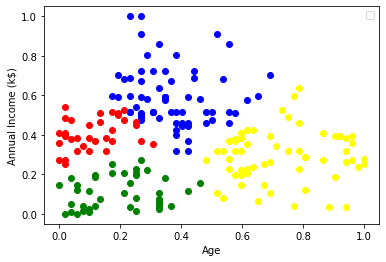

In [45]:
#ploting
plt.scatter(data0['Age'],data0['Annual Income (k$)'],color='blue')
plt.scatter(data1['Age'],data1['Annual Income (k$)'],color='yellow')
plt.scatter(data2['Age'],data2['Annual Income (k$)'],color='green')
plt.scatter(data3['Age'],data3['Annual Income (k$)'],color='red')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()


In [51]:
#centroid
km.cluster_centers_

array([[0.37011834, 0.59218159],
       [0.72982346, 0.29427573],
       [0.19567308, 0.10963115],
       [0.11142534, 0.40766635]])

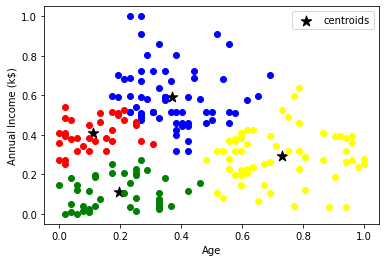

In [56]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',label='centroids',s=120,c='black')

plt.scatter(data0['Age'],data0['Annual Income (k$)'],color='blue')
plt.scatter(data1['Age'],data1['Annual Income (k$)'],color='yellow')
plt.scatter(data2['Age'],data2['Annual Income (k$)'],color='green')
plt.scatter(data3['Age'],data3['Annual Income (k$)'],color='red')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()